In [4]:
library('igraph')
library('Matrix')
library('pracma')

In [5]:
#helper functions

#creating the transition matrix of the graph
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

#Function for random walk
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

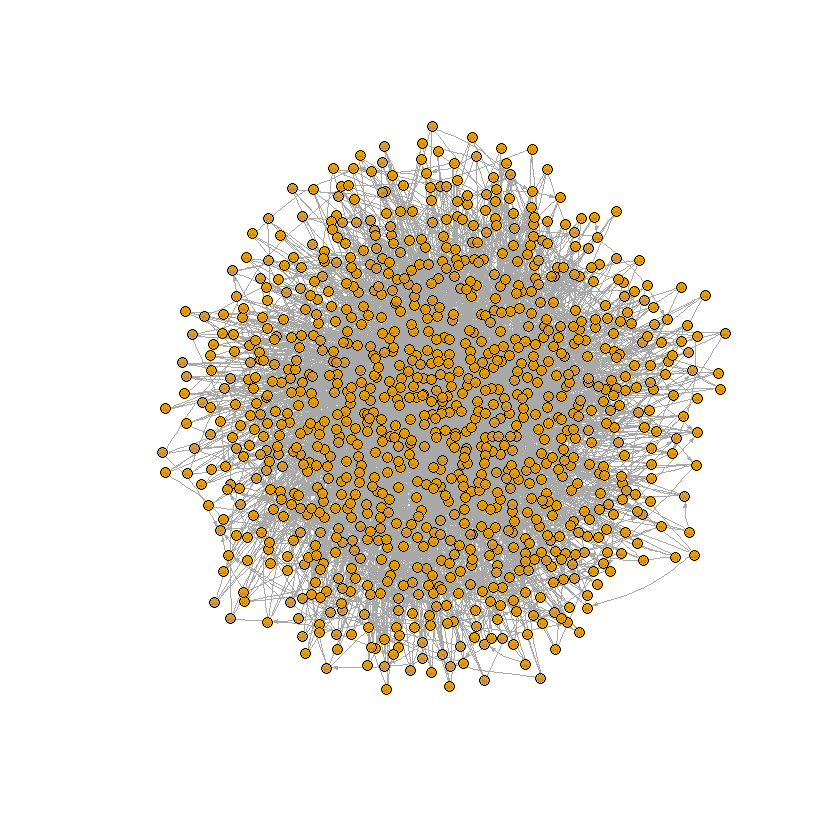

In [6]:
#create a pref attachment network

set.seed(1)
g = barabasi.game(1000, m = 4, directed = T)
plot(g, vertex.size = 4, vertex.label.cex = 0.2,edge.arrow.size=.2, edge.curved=0.2)


In [21]:
steady_state_node = c()


for(i in sample.int(1000, size = 250)){
v_last = random_walk(g,20,i)
steady_state_node = c(steady_state_node, v_last)
}
print(steady_state_node)

  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


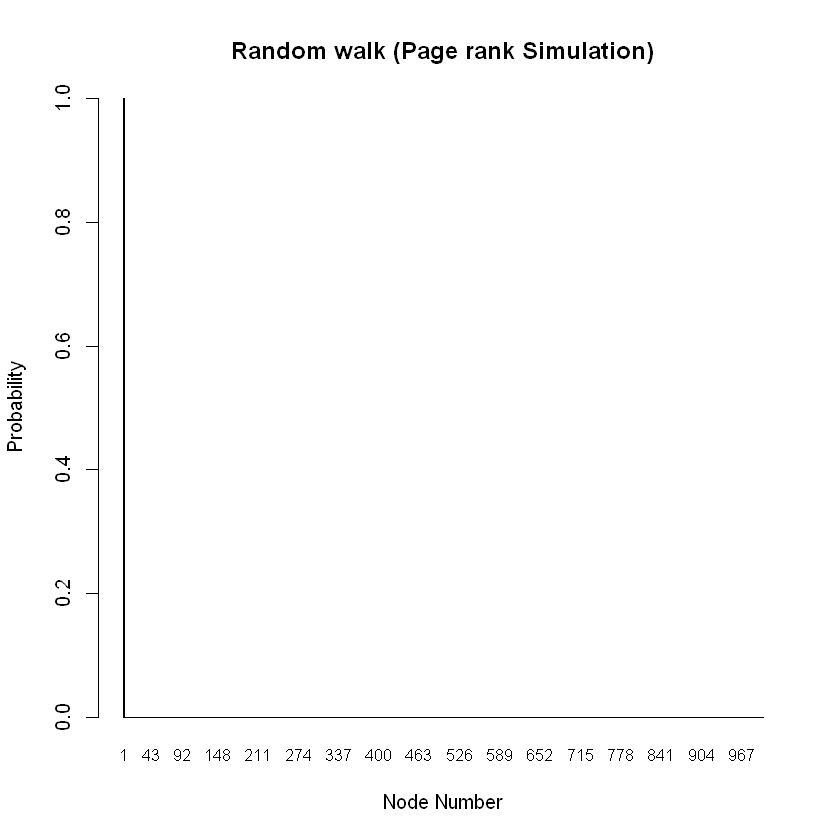

In [22]:
x = 1:1000
counts = integer(1000)
for(i in steady_state_node)
{
        counts[i] = counts[i] + 1
}
#my_mat = matrix(c(x,counts/250), nrow = 1000,ncol = 2)
barplot(counts/250,main= "Random walk (Page rank Simulation)", xlab = "Node Number", ylab = "Probability"
       , names.arg= x, cex.names = 0.8,ylim=c(0, 1.0))

In [23]:
#Function for random walk with teleportation
random_walk_modified = function (g, num_steps, start_node, transition_matrix = NULL, teleportation_Prob = 0){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        rand_num = sample(1:100,1)
        if(rand_num <= (teleportation_Prob*100))
            v = sample(1:vcount(g),1)
        else
            v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [24]:
steady_state_node = c()


for(i in sample.int(1000, size = 250)){
v_last = random_walk_modified(g,20,i, teleportation_Prob = 0.15)
steady_state_node = c(steady_state_node, v_last)
}
print(steady_state_node)

  [1]   1   3   1   4   1   1  34   1   1   1   1   2   1   1   2   1   1   4
 [19]   1   1   2   1   4 165   1   1   2  13   1   1   8 603   2  13   1   1
 [37]   2   1 152   1   1   1 897   1   1   1   1 779 612   3   3   1   9   1
 [55]   1   1   1   1  32   1   1   1   1  38 173   1   8   1  37 173   3  96
 [73]   1   9   1   5 972   1  26   1   1   1   6   1   1   1   1  36   1   1
 [91]   1   1   3   1   1   1   1  13  68   1   8 139   1   1   3   1 704  27
[109]   1   1   1   4   3   1   1   1   2  59   1 407   1   1   1   1 391   1
[127]   1   2   1   1 204   1   1   2 142   1   4   5 718   1 401 719   1   1
[145]   1   1   1   1   1 743 402   1 672   1   1   1   1   1   1   1  36 815
[163]   5   1   3   1   1   3   1   6   8 757 935   1   1   1   3   1   1   1
[181]   1   6   1   1   2 582   1   1   1   1   1   5   1   1   1   1  32   1
[199]   1   1   1 806  52   1   1   1   6   1 474   1   1   1   1   1 682   2
[217]   1   2  34   1   9  23   1 486   1   1   1   3   1  70   

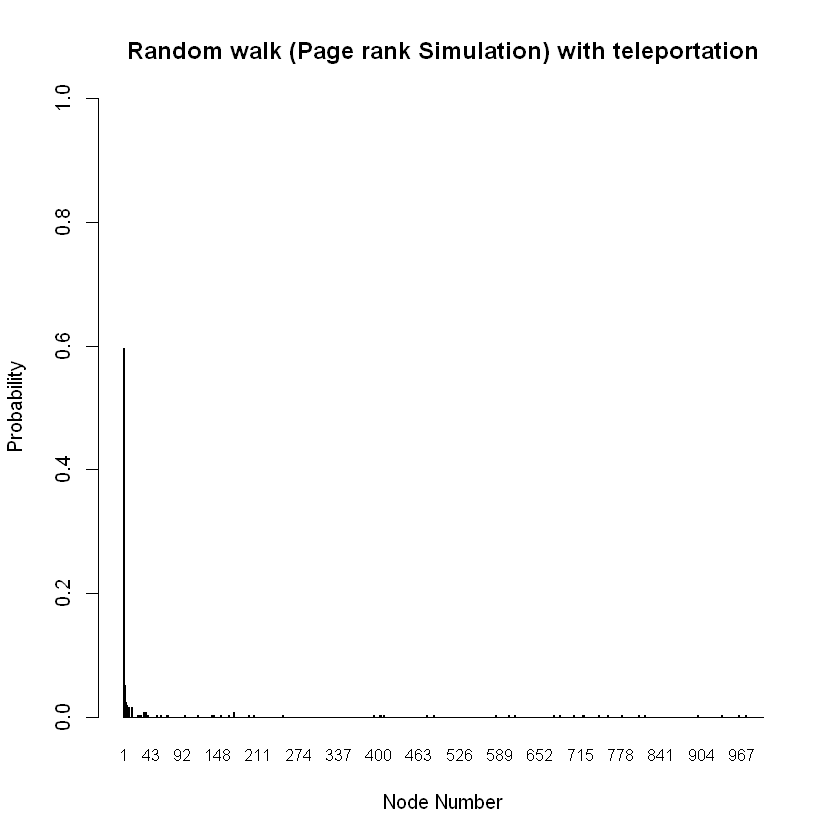

In [25]:
x = 1:1000
counts = integer(1000)
for(i in steady_state_node)
{
        counts[i] = counts[i] + 1
}
#my_mat = matrix(c(x,counts/250), nrow = 1000,ncol = 2)
barplot(counts/250,main= "Random walk (Page rank Simulation) with teleportation", xlab = "Node Number", ylab = "Probability"
       , names.arg= x, cex.names = 0.8, ylim=c(0, 1.0))